In [29]:
import torch
import torchvision
import torch.nn as nn
import matplotlib.pyplot as plt

In [30]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
dataset = torchvision.datasets.CIFAR10(root='datasets')
images = torch.tensor(dataset.data).permute(0, 3, 1, 2).float()

In [31]:
indices = torch.randperm(images.size(0))
images = images[indices]
images /= torch.max(images)

train_set = images[:48000]
dev_set = images[48000:49000]
test_set = images[49000:]

In [32]:
class CIFAR10AutoEncoder(nn.Module):

    def __init__(self):

        super().__init__()

        self.encoder = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=16, padding=1, stride=2, kernel_size=4),
            nn.ReLU(),

            nn.Conv2d(in_channels=16, out_channels=32, padding=1, stride=2, kernel_size=4),
            nn.ReLU(),

            nn.Conv2d(in_channels=32, out_channels=64, padding=1, stride=2, kernel_size=4),   # latent layer
            nn.ReLU()
        )

        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(in_channels=64, out_channels=32, padding=1, stride=2, kernel_size=4),
            nn.ReLU(),

            nn.ConvTranspose2d(in_channels=32, out_channels=16, padding=1, stride=2, kernel_size=4),
            nn.ReLU(),

            nn.ConvTranspose2d(in_channels=16, out_channels=3, padding=1, stride=2, kernel_size=4)
        )


    def forward(self, x):

        return self.decoder(self.encoder(x))

In [33]:
auto_encoder = CIFAR10AutoEncoder()
auto_encoder.to(device)
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(auto_encoder.parameters(), lr=.001)

In [34]:
num_epochs = 10 

for epoch_index in range(num_epochs):
    for image_index in range(train_set.size(0)):

        train_image = train_set[image_index]
        train_image = train_image.to(device)
        prediction = auto_encoder(train_image)

        loss = loss_function(prediction, train_image)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

dev_set = dev_set.to(device)
dev_set_predictions = auto_encoder(dev_set)
loss = loss_function(dev_set_predictions, dev_set)

print("MSE loss = "+str(loss.item()))
print("Accuracy = "+ str((1 - loss.item())*100))

MSE loss = 0.0008128935587592423
Accuracy = 99.91871064412408


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

Text(0.5, 1.0, 'Predicted')

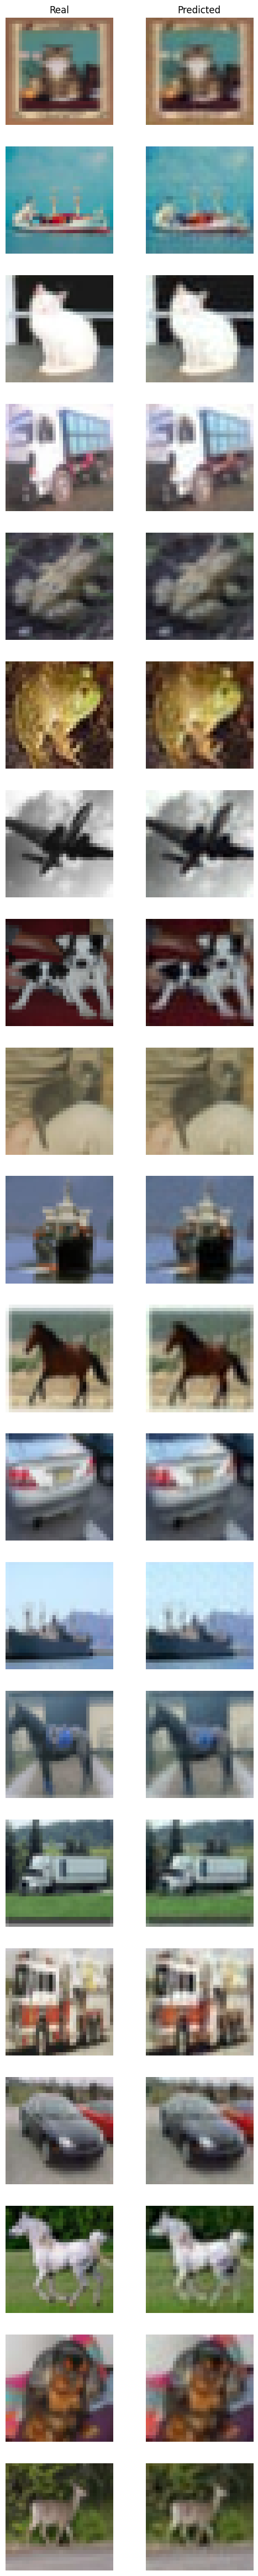

In [35]:
num_images = int(dev_set.size(0) / 50)

fig, axes = plt.subplots(num_images, 2, figsize=(6, num_images * 3))
for i in range(num_images):
    axes[i, 0].imshow(dev_set[i].permute(1, 2, 0).cpu().detach().numpy())  # Change shape to (32, 32, 3)
    axes[i, 0].axis('off')  # Hide axes


    axes[i, 1].imshow(dev_set_predictions[i].permute(1, 2, 0).cpu().detach().numpy())  # Change shape to (32, 32, 3)
    axes[i, 1].axis('off')  # Hide axes


axes[0, 0].set_title('Real')
axes[0, 1].set_title('Predicted')